# Predicting heart disease using machine learning


Building a machine learning model to predict if a person have heart disease or not 

things covered -

- problem defination
- data
- evaluation
- features
- modelling
- experimentaion 

## Problem defination 
-  can we predict wheather the person has heart disease or not.

## Data 
- The original data is from uci machine learning dataset

 https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
## Evaluation 
- can we reach 95% accuracy at predicting

## Features 
creating a data dictionary 

1- id (Unique id for each patient)

2- age (Age of the patient in years)

3- origin (place of study)

4- sex (Male/Female)

5- cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])

6- trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

7- chol (serum cholesterol in mg/dl)

8- fbs (if fasting blood sugar > 120 mg/dl)

9- restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]

10- thalach: maximum heart rate achieved

11- exang: exercise-induced angina (True/ False)

12- oldpeak: ST depression induced by exercise relative to rest

13- slope: the slope of the peak exercise ST segment

14- ca: number of major vessels (0-3) colored by fluoroscopy

15- thal: [normal; fixed defect; reversible defect]

16- num: the predicted attribute



In [ ]:
!pip install seaborn


In [175]:
#preparing the tools

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
import seaborn as sns

In [7]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploring data

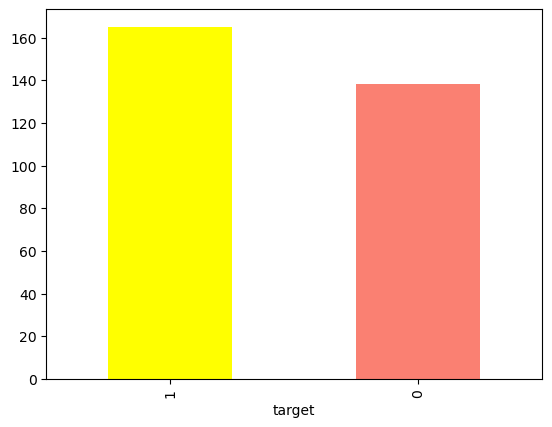

In [14]:
df["target"].value_counts().plot(kind = "bar", color = ["yellow", "salmon"]);
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
#heart disease frequency on basis of sex ratio
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [23]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

total women = 96 
total men = 207

out of 96 women 72 have heart disease 

out 207 women 93 have heart disease


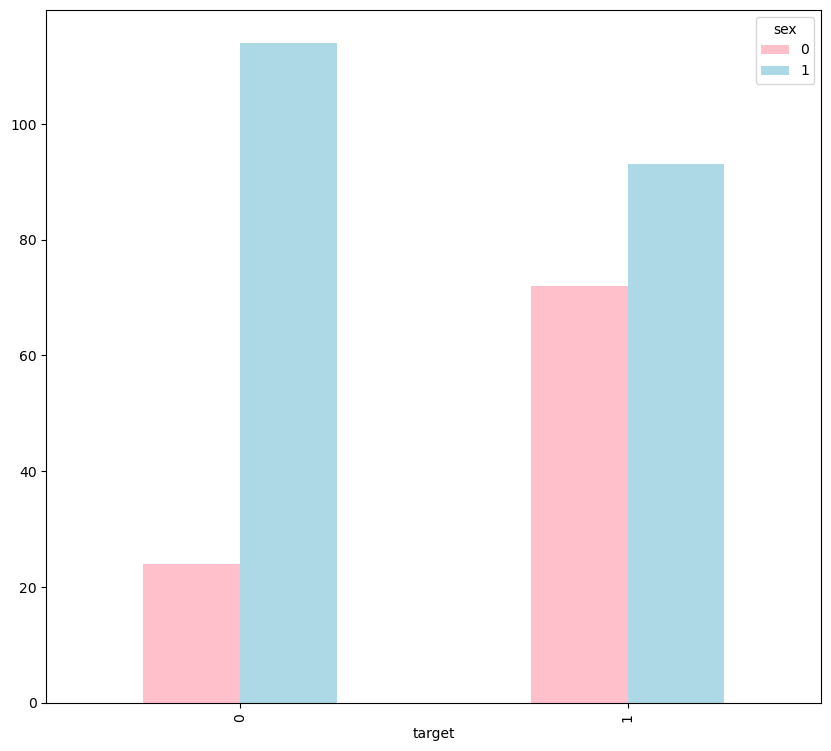

In [28]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,9), color = ["pink", "lightblue"])
plt.show();

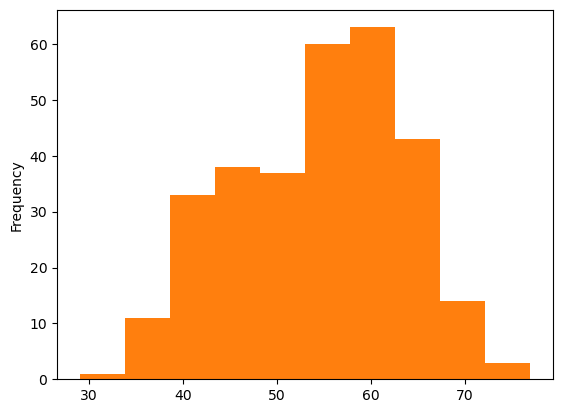

In [30]:
df.age.plot.hist()
plt.show();

normal distribution 

In [32]:
#heart disease frequency on cp 
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


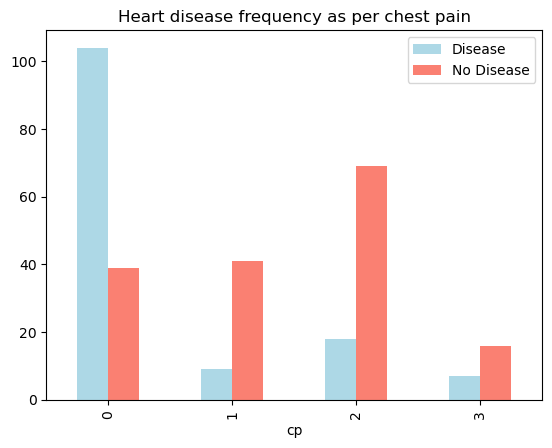

In [204]:
pd.crosstab(df.cp, df.target).plot(kind="bar", color = ["lightblue", "salmon"])
plt.title("Heart disease frequency as per chest pain")
plt.legend(["Disease", "No Disease"])
plt.show();

### creating a correlation matrix

In [43]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


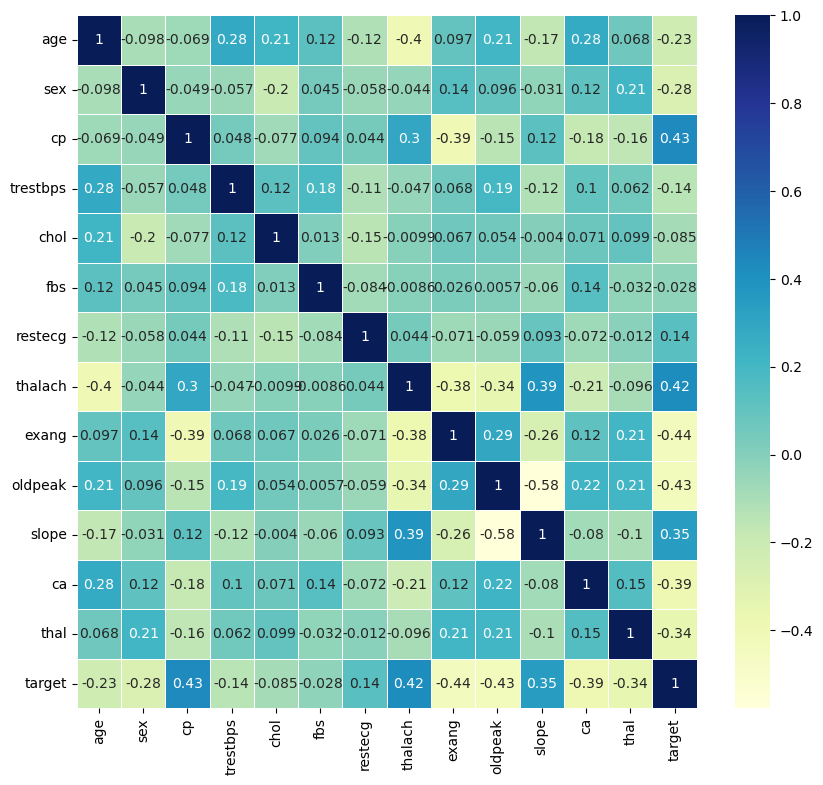

In [56]:
corr_mat = df.corr()
fig, ax = plt.subplots(figsize =(10,9))
ax = sns.heatmap(corr_mat,
                annot = True,
                linewidth = 0.5,
                cmap="YlGnBu")
plt.show();

## Modeling

In [59]:
#splitting the data into features and labels
np.random.seed(42)
X = df.drop("target", axis = 1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

model ={"LogisticRegression": LogisticRegression(),
       "KNN": KNeighborsClassifier(),
       "RandomForesrt": RandomForestClassifier()}

def fit_and_score(model, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_score={} # to store the result 
    for name, model in model.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
    return model_score

In [61]:
model_score = fit_and_score(model = model,
                            X_train= X_train,
                            X_test =X_test,
                            y_train = y_train,
                            y_test= y_test)
model_score

C:\Source code\AIML\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForesrt': 0.8360655737704918}

how each model perform as baselinem


In [65]:
comparision = pd.DataFrame(model_score, index = ["accuracy"])
comparision

,LogisticRegression,KNN,RandomForesrt
accuracy,0.885246,0.688525,0.836066


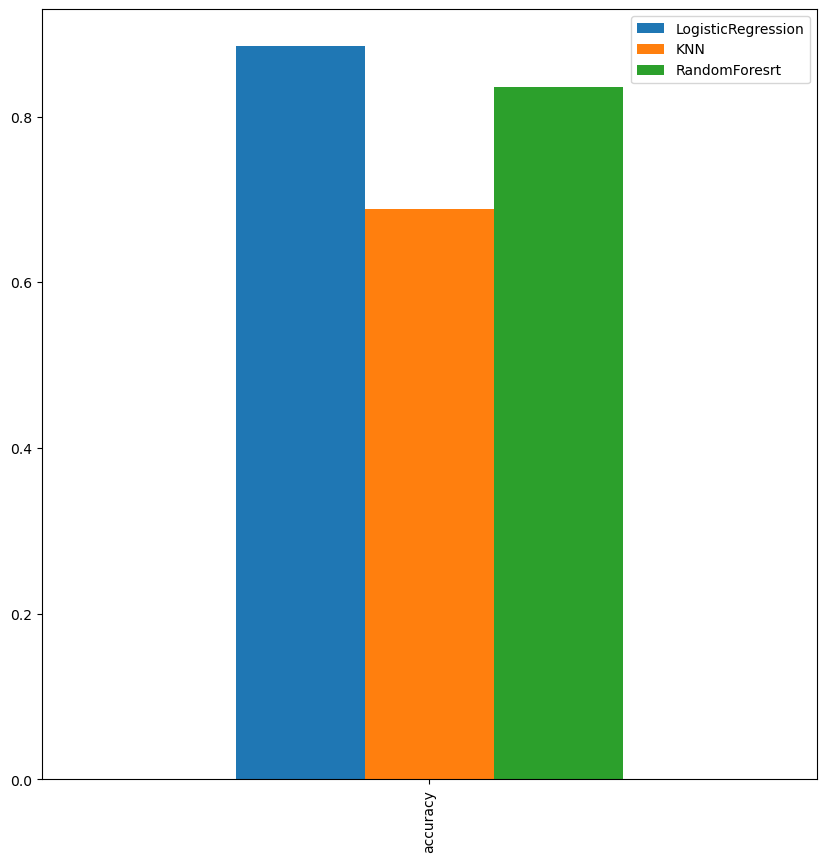

In [71]:
comparision.plot.bar(figsize =(10,10))
plt.show();

now focusing on the following 

- hyperparameter tunning
- feature importance
- precision
- f1 score
- recall
- classification report
- area under roc curve
- roc curve

## Hyperparameter tunning
### by hand

In [104]:
# tunning the knn model 
train_score=[]
test_score=[]
neighbors= range(1,21)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    #update the train score list 
    train_score.append(knn.score(X_train, y_train))
    #updating the test score list
    test_score.append(knn.score(X_test, y_test))
    

In [105]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [106]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

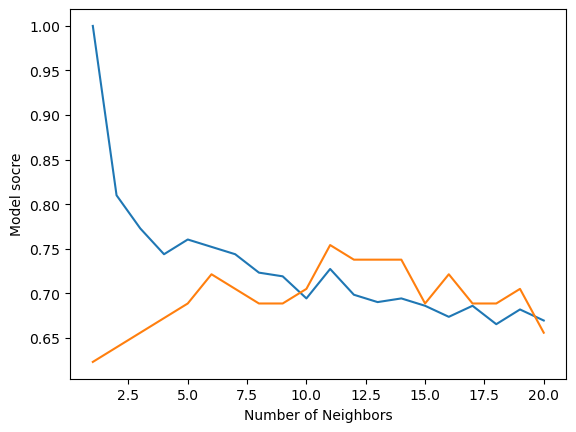

In [107]:
plt.plot(neighbors, train_score, label="Train score")
plt.plot(neighbors, test_score, label="Test score")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model socre")
plt.show()

In [108]:
print(f"Max KNN score on the test data: {max(test_score)*100:.2f}%")

Max KNN score on the test data: 75.41%


still hasn't reached the score to surpass randomforest and linear regression


## Hyperparameter tunning by RandomizedSearchCV

for 
- logisticregression
- randomforestrclassifier

In [100]:
log_reg_grid = { "C": np.logspace(-4,4,20),
               "solver":["liblinear"]}
#hyper parameter for logistic regression

In [101]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [118]:
#hyper parameter for random forest

rf_grid= {"n_estimators": np.arange(10,1000,50),
         "max_depth": [None, 5,10,15],
         "min_samples_split": np.arange(2,10,2),
         "min_samples_leaf" : np.arange(1,20,2)}

In [119]:
#setup hyperparameters
rs_log_reg = RandomizedSearchCV( LogisticRegression(), param_distributions =log_reg_grid, cv = 5, n_iter = 20)
# fit the data 
rs_log_reg.fit(X_train, y_train)

,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [111]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [112]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

same for linear regression 


In [120]:
## tunning randomforestclassifier

np.random.seed(42)
rf_rs = RandomizedSearchCV(RandomForestClassifier(), param_distributions = rf_grid, cv= 5 , n_iter= 20, verbose = True)
rf_rs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 5, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([2, 4, 6, 8]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [121]:
rf_rs.score(X_test, y_test)

0.8852459016393442

from 83.6% to  88.5%

In [122]:
rf_rs.best_params_

{'n_estimators': np.int64(110),
 'min_samples_split': np.int64(6),
 'min_samples_leaf': np.int64(17),
 'max_depth': 5}

In [125]:
model_score

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForesrt': 0.8360655737704918}

still the logistic regression is better for this case

## Hyperparameter tunning with gridsearchcv

In [127]:
log_reg_grid = { "C": np.logspace(-4,4,30),
               "solver":["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 5,
                         verbose = True)
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [128]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [129]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

at end we conclude to have logisticregression with highest accuracy

## Evaluating other metrics
evaluating other things 
- f1_score
- recall
- confusion matrix
- roc curve
- precision

In [130]:
#making the prediction
y_preds = gs_log_reg.predict(X_test)

In [131]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [132]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

## ROC curve

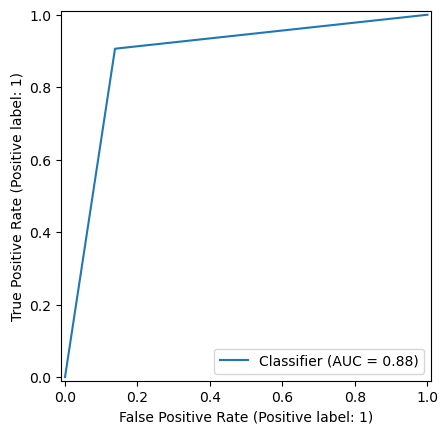

In [141]:
#roc curve
RocCurveDisplay.from_predictions(y_test, y_preds)
plt.show();

In [146]:
print(confusion_matrix(y_test,y_preds))


[[25  4]
 [ 3 29]]


## Confusion matrix

In [150]:
#plotting the condusion matrix 
def plot_confusion(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds))
    plt.xlabel("True label")
    plt.ylabel("predicted label")
    

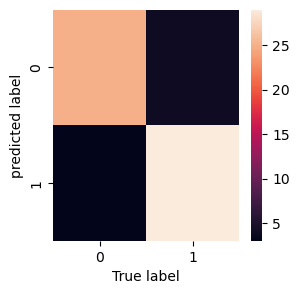

In [153]:
plot_confusion(y_test, y_preds)
plt.show();

In [154]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## cross val score

In [209]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [164]:
clf = LogisticRegression(C= np.float64(0.20433597178569418), solver= 'liblinear')


In [166]:
#for accuracy 
cv_acc = cross_val_score(clf, X,y, scoring = "accuracy", cv = 5)
cv_acc = np.mean(cv_acc)
cv_acc


np.float64(0.8446994535519124)

In [167]:
#precision
cv_precision = cross_val_score(clf, X, y , scoring ="precision")
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8207936507936507)

In [168]:
# recall
cv_recall = cross_val_score(clf, X, y, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [172]:
#f1_score
cv_f1 = cross_val_score(clf, X, y, scoring="f1")
cv_f1 = cv_f1.mean()
cv_f1

np.float64(0.8673007976269721)

In [180]:
cv_metrics= pd.DataFrame({"accuracy": cv_acc,
                      "precision": cv_precision,
                      "recall": cv_recall,
                      "f1_score": cv_f1}, index =[0])

In [206]:
cv_metrics

,accuracy,precision,recall,f1_score
0,0.844699,0.820794,0.921212,0.867301


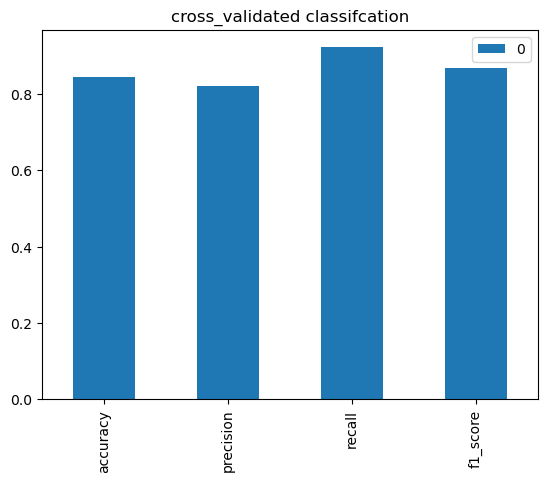

In [187]:
cv_metrics.T.plot.bar(title="cross_validated classifcation")
plt.show();

## Features 

In [190]:
# fit an instance of logistic regresion

clf =LogisticRegression(C= np.float64(0.20433597178569418), solver= 'liblinear')
clf.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,np.float64(0....3597178569418)
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [193]:
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [194]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

In [195]:
feature_dict

{'age': np.float64(0.0031672721856887734),
 'sex': np.float64(-0.860445816920919),
 'cp': np.float64(0.6606707303492849),
 'trestbps': np.float64(-0.011569930902919925),
 'chol': np.float64(-0.001663741604035976),
 'fbs': np.float64(0.04386130751482091),
 'restecg': np.float64(0.3127578715206996),
 'thalach': np.float64(0.02459360818122666),
 'exang': np.float64(-0.6041303799858143),
 'oldpeak': np.float64(-0.5686285194546157),
 'slope': np.float64(0.4505161679452401),
 'ca': np.float64(-0.6360986316921434),
 'thal': np.float64(-0.6766337521354281)}

In [196]:

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003167,-0.860446,0.660671,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.60413,-0.568629,0.450516,-0.636099,-0.676634


In [197]:
feature_df.plot.bar()

<Axes: >

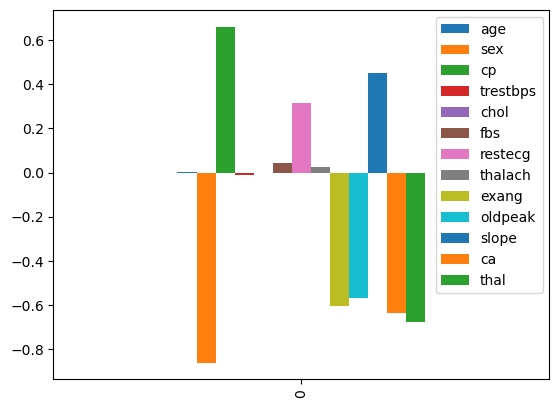

In [198]:
plt.show();


In [199]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [201]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


- 0- unslopping - better heart with exercise
- 1- flatslopping - minimal chnage with exercise
- 2- downsloping - unhealthy heart
